In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def load_data():
    dfs = []
    for idx in range(1, 151):
        with open(f'dataset/sinwave_x10_entry{idx}.dat', 'r') as f:
            data = np.array([list(map(float, e.split())) for e in f.read().strip().split('\n')])
            cols = ['time'] + [f'u{i}' for i in range(1, 5)] + [f'x{i}' for i in range(1, 5)]
            dfs.append(pd.DataFrame(data, columns=cols))
        with open(f'dataset/target{idx}.dat', 'r') as f:
            label = list(map(int, f.readline().strip().split()))
            for i, label_i in enumerate(label):
                dfs[idx-1][f'y{i}'] = label_i
    return dfs

In [50]:
dfs = load_data()

In [51]:
dfs[0].head()

,time,u1,u2,u3,u4,x1,x2,x3,x4,y0,y1,y2
0,0.0000,0.00,0.00,0.00,0.0,-0.0018,-0.0031,-0.0006,-0.0018,1,0,0
1,0.0002,0.01,0.01,0.00,0.0,-0.0024,-0.0018,-0.0006,-0.0031,1,0,0
2,0.0004,0.02,0.01,0.01,0.0,-0.0018,-0.0031,0.0043,0.0018,1,0,0
3,0.0006,0.03,0.02,0.01,0.0,0.0037,0.0024,0.0079,0.0061,1,0,0
4,0.0008,0.04,0.03,0.01,0.0,0.0073,0.0061,0.0128,0.0110,1,0,0


In [61]:
dfs[0].shape

(15000, 12)

In [68]:
def plot_u_x(df):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 4), dpi=200, sharex=True)
    if df['y0'][0] == 1:
        cls = 'A'
    elif df['y1'][0] == 1:
        cls = 'B'
    elif df['y2'][0] == 1:
        cls = 'C'
    fig.suptitle(f'Class {cls}')
    for i in range(1, 5):
        axs[0].set_title('input signal $u_i(n)$')
        axs[0].plot(df['time'], df[f'u{i}'])
        axs[1].set_title('reservoir readout $x_i(n)$')
        axs[1].plot(df['time'], df[f'x{i}'])
        axs[1].set_xlabel('time (in seconds)')
    plt.tight_layout()

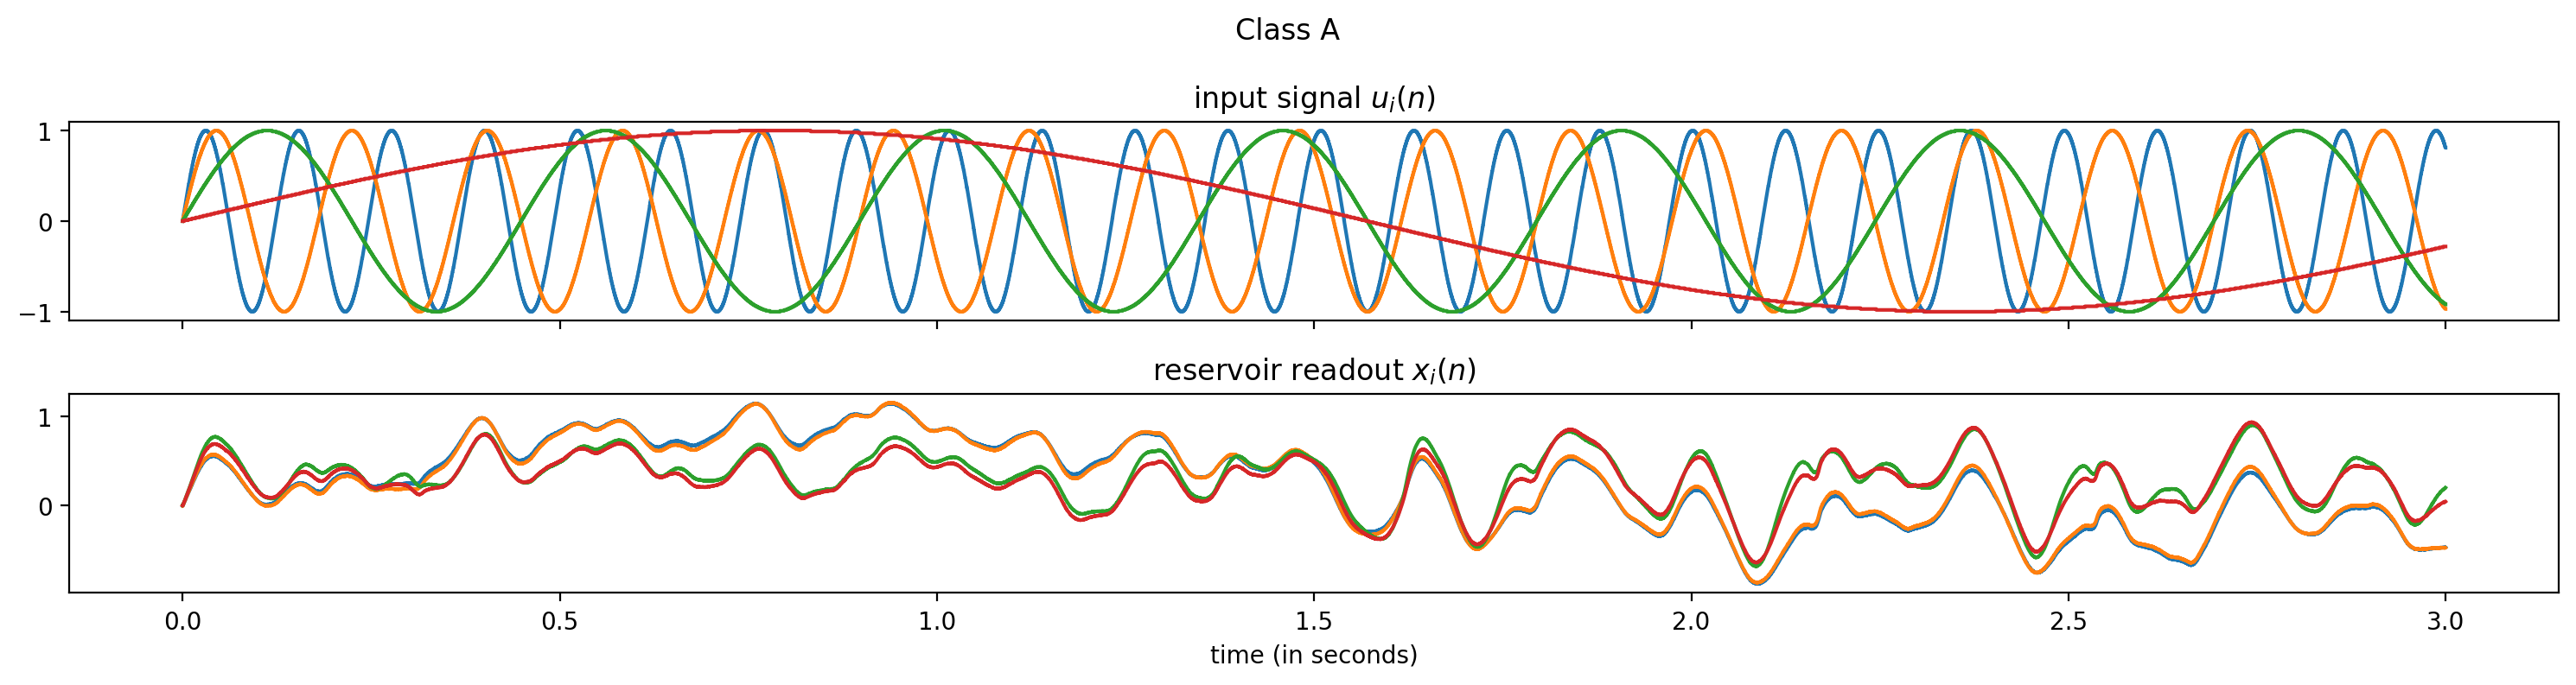

In [69]:
plot_u_x(dfs[0])

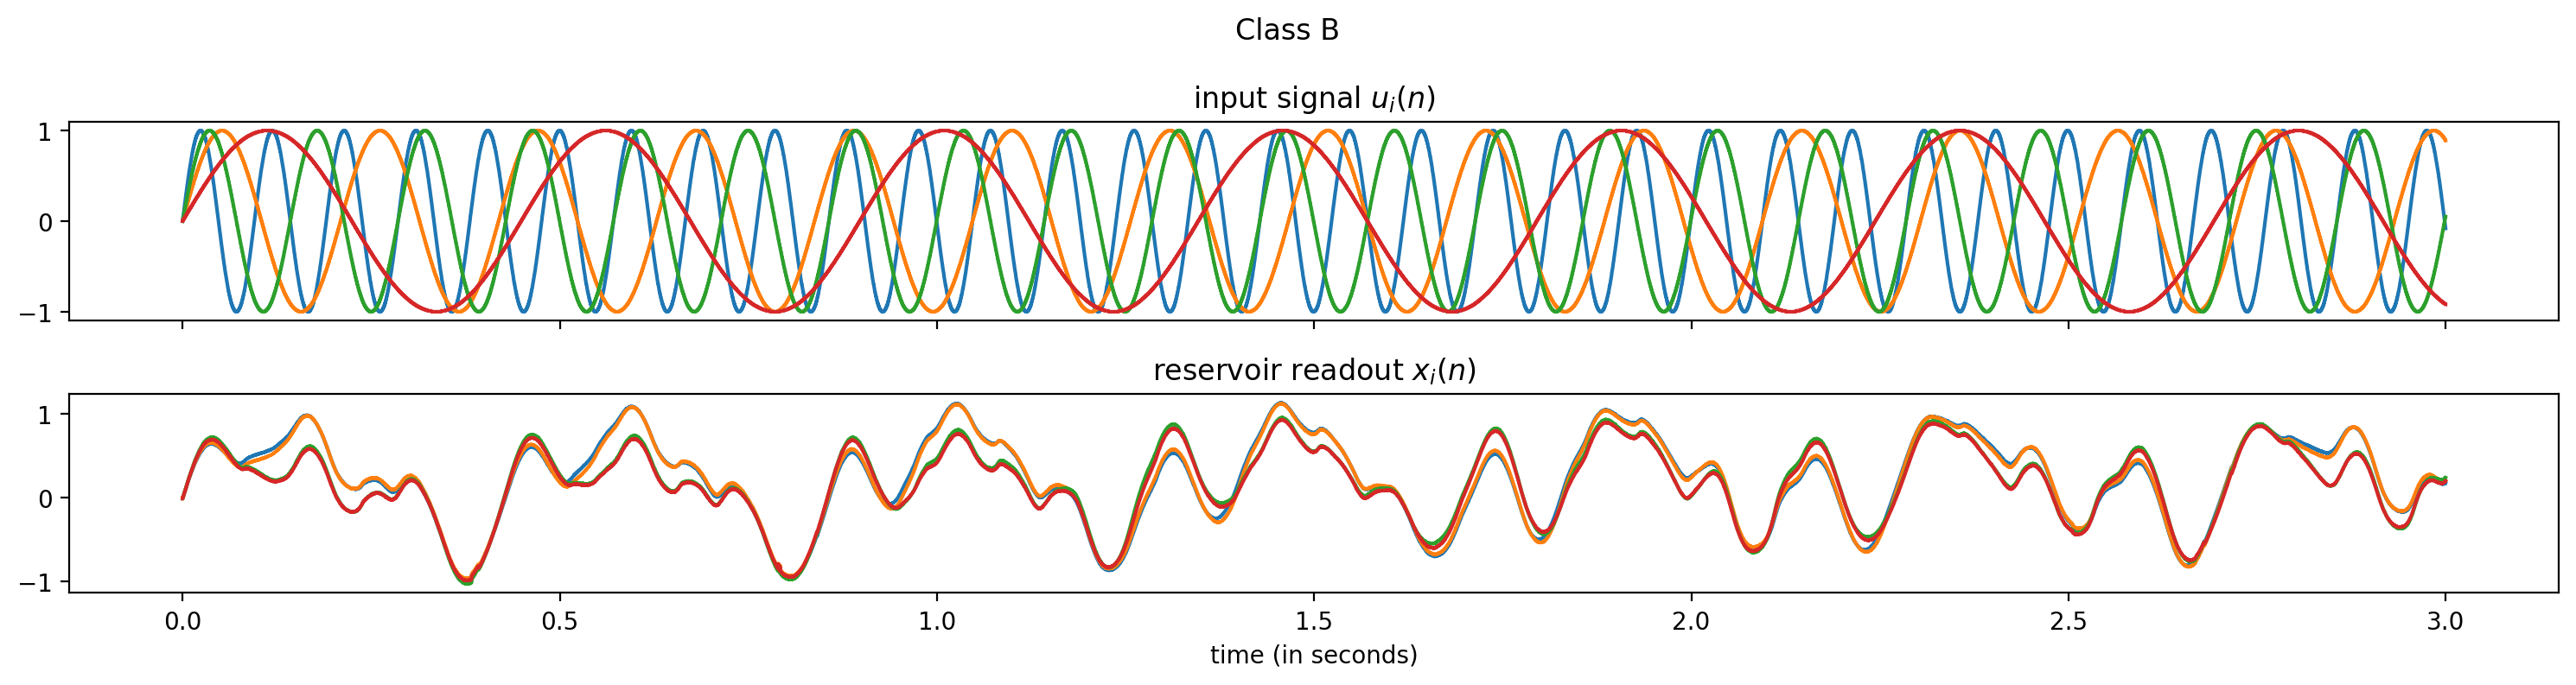

In [70]:
plot_u_x(dfs[75])

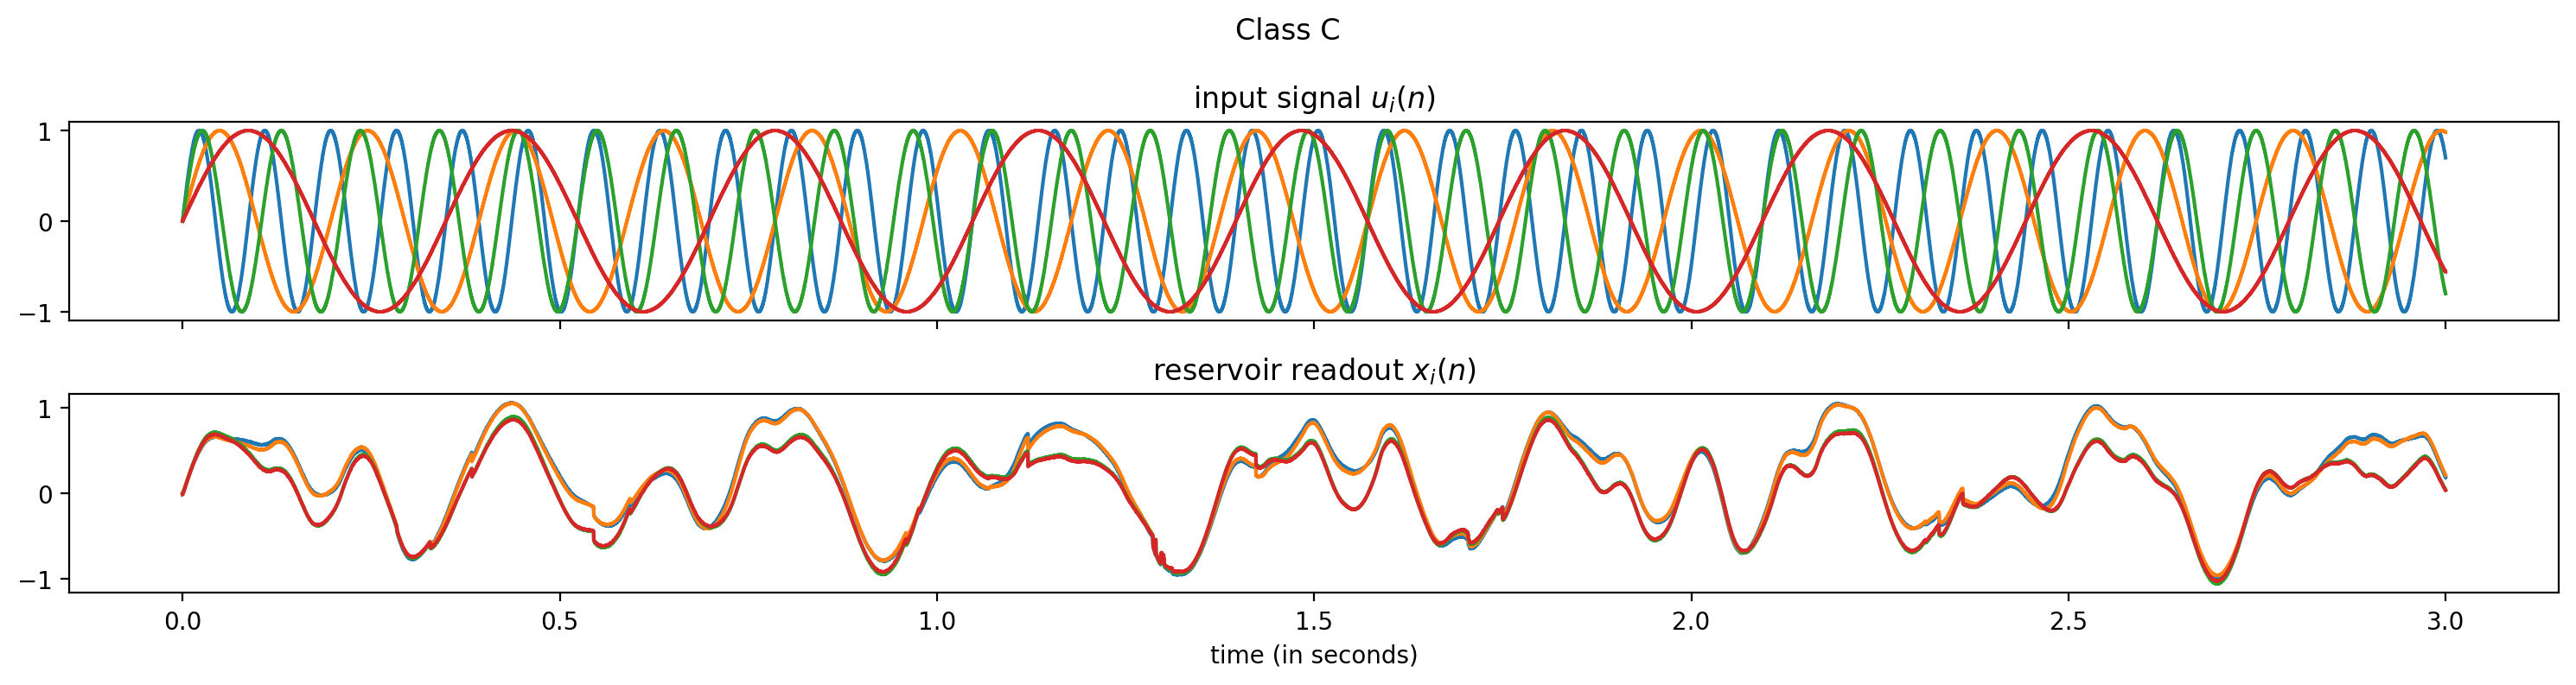

In [71]:
plot_u_x(dfs[125])